In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, TrainingArguments, Trainer

# Load data
df = pd.read_csv("/content/drive/MyDrive/fullcommand2.csv")

# Keep only the columns we need
df = df[['question', 'command']].dropna()

# Rename for HuggingFace format
df = df.rename(columns={'question': 'input_text', 'command': 'target_text'})

# Convert to HuggingFace Dataset
dataset = Dataset.from_pandas(df)

# Split into train/test
dataset = dataset.train_test_split(test_size=0.1)

# Load tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-base')

# Tokenization function
def preprocess(example):
    input_enc = tokenizer(example['input_text'], padding='max_length', truncation=True, max_length=64)
    target_enc = tokenizer(example['target_text'], padding='max_length', truncation=True, max_length=64)
    input_enc['labels'] = target_enc['input_ids']
    return input_enc

# Tokenize dataset
tokenized = dataset.map(preprocess, batched=True)

# Load model
model = T5ForConditionalGeneration.from_pretrained('t5-base')

# Training arguments
training_args = TrainingArguments(
    output_dir="./t5_kube_model",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    learning_rate=3e-4,
    num_train_epochs=4,
    eval_strategy="epoch",
    logging_dir='./logs',
    save_strategy="epoch",
    weight_decay=0.01,
    push_to_hub=False,
    report_to="none",
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized["train"],
    eval_dataset=tokenized["test"],
    tokenizer=tokenizer
)

# Train!
trainer.train()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/31395 [00:00<?, ? examples/s]

Map:   0%|          | 0/3489 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/tmp/ipython-input-3932082829.py:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


In [ ]:
!cp -r /content/t5_kube_model/checkpoint-23547 /content/drive/MyDrive/

cp: cannot stat '/content/t5_kube_model/checkpoint-23547': No such file or directory


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# model = T5ForConditionalGeneration.from_pretrained("/content/t5_kube_model/checkpoint-31396")
model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/checkpoint-23547")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def predict(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    output_ids = model.generate(inputs.input_ids, max_length=64)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Example
print(predict("Create TLS certificates|"))


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


kubectl create certificate tls --class=default  --rule="foo.com/*=svc:8081,tls=secret1"


In [ ]:
print(predict("Create a deployment of nginx with 3 replicas"))

kubectl create deployment nginx --image=nginx --replicas=3


In [ ]:
print(predict("Print the API resources available in the 'hugging' API group"))

kubectl api-resources --api-group=hugging


In [ ]:
print(predict("Get the documentation of a specific field of a resource"))

kubectl explain resource=pods


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# model = T5ForConditionalGeneration.from_pretrained("/content/t5_kube_model/checkpoint-31396")
model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/checkpoint-23547")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def predict(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    output_ids = model.generate(inputs.input_ids, max_length=64)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Example
print(predict("Create TLS certificates|"))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


kubectl create certificate tls --class=default  --rule="foo.com/*=svc:8081,tls=secret1"


# API ngrok

In [ ]:
!pip install -q flask-ngrok

In [ ]:
!pip install pyngrok flask

In [ ]:
!export NGROK_AUTHTOKEN=

In [ ]:
!ngrok config add-authtoken 

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
from transformers import T5ForConditionalGeneration, T5Tokenizer

app = Flask(__name__)
run_with_ngrok(app)  # exposes it via ngrok public URL

# Load model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/checkpoint-23547")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def predict(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    output_ids = model.generate(inputs.input_ids, max_length=64)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

@app.route('/predict', methods=['GET'])
def predict_endpoint():
    query = request.args.get('q', '')
    if not query:
        return jsonify({'error': 'Missing query parameter "q"'}), 400
    result = predict(query)
    return jsonify({'input': query, 'output': result})

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            

In [ ]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/checkpoint-23547")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def predict(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    output_ids = model.generate(inputs.input_ids, max_length=64)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

app = Flask(__name__)

@app.route('/predict', methods=['GET'])
def predict_endpoint():
    query = request.args.get('q', '')
    if not query:
        return jsonify({'error': 'Missing query parameter "q"'}), 400
    result = predict(query)
    return jsonify({'input': query, 'output': result})

# ---- Start ngrok tunnel manually ----
public_url = ngrok.connect(5000).public_url
print(f"✅ Public API URL: {public_url}/predict?q=Create+TLS+certificates")

# ---- Run Flask normally ----
app.run(port=5000)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


✅ Public API URL: https://labile-overdevotedly-marcell.ngrok-free.dev/predict?q=Create+TLS+certificates
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:werkzeug:127.0.0.1 - - [30/Oct/2025 13:06:27] "GET /predict?q=show%20all%20pods HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Oct/2025 13:06:54] "GET /predict?q=show%20all%20pods%20in%20default%20namespace HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Oct/2025 13:07:10] "GET /predict?q=create%20nginx%20deployment HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Oct/2025 13:07:34] "GET /predict?q=create%20nginx%20deployment%20with%20mongodb%20image%20and%203%20replicas HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Oct/2025 13:07:41] "GET /predict?q=create%20nginx2%20deployment%20with%20mongodb%20image%20and%203%20replicas HTTP/1.1" 200 -


# Upload

In [ ]:
!cp -r /content/drive/MyDrive/checkpoint-23547 /content/model

In [ ]:
!pip -q install huggingface_hub
from huggingface_hub import HfApi, create_repo
from huggingface_hub import hf_hub_download
from huggingface_hub import login

login(token="")
# --- config ---
repo_id       = "tarun122/t5-cpt-2"        # e.g. "alice/my-model"
folder_path   = "/content/model"  # the folder you want to upload
repo_type     = "model"                   # or "dataset" / "space"
private       = False                     # True if you want it private
commit_msg    = "Upload folder"
path_in_repo  = ""                        # optional subdir inside repo, e.g. "data/"

# 1) Make sure the repo exists (idempotent)
create_repo(repo_id, repo_type=repo_type, private=private, exist_ok=True)

# 2) Upload the entire folder
api = HfApi()
api.upload_folder(
    repo_id=repo_id,
    repo_type=repo_type,
    folder_path=folder_path,
    path_in_repo=path_in_repo,        # "" to upload at repo root
    commit_message=commit_msg,
    # token=None                      # optional; otherwise uses HF_TOKEN env or cached login
)
print("Done!")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...point-23547/rng_state.pth:  78%|#######7  | 11.0kB / 14.2kB            

  ...kpoint-23547/spiece.model: 100%|##########|  792kB /  792kB            

  ...t-23547/model.safetensors:   0%|          |  553kB /  892MB            

  ...kpoint-23547/optimizer.pt:   0%|          | 38.2kB / 1.78GB            

  ...kpoint-23547/scheduler.pt:   6%|6         |  69.0B / 1.06kB            

  ...t-23547/training_args.bin:   7%|6         |   342B / 5.24kB            

Done!


Fri Aug  1 19:14:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Evaluate

In [ ]:
!pip install rouge-score
!pip install python-Levenshtein
!pip install wordcloud

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=a1904450f13d7be1954c66e6c466141507ce36079279775afb2ca2a55beedebe
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 50.5 MB/s eta 0:00:00


Evaluating model on test set...


100%|██████████| 40/40 [00:51<00:00,  1.30s/it]



EVALUATION RESULTS
Average BLEU Score: 0.6016
Average ROUGE-L Score: 0.9650
Exact Match Accuracy: 0.8500 (34/40)
Average Edit Distance: 1.65


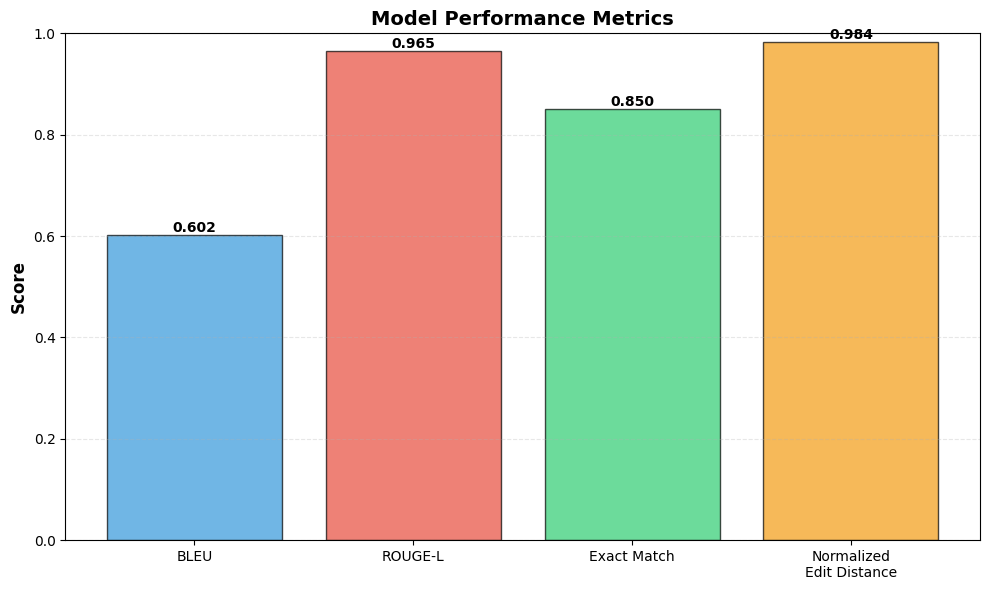

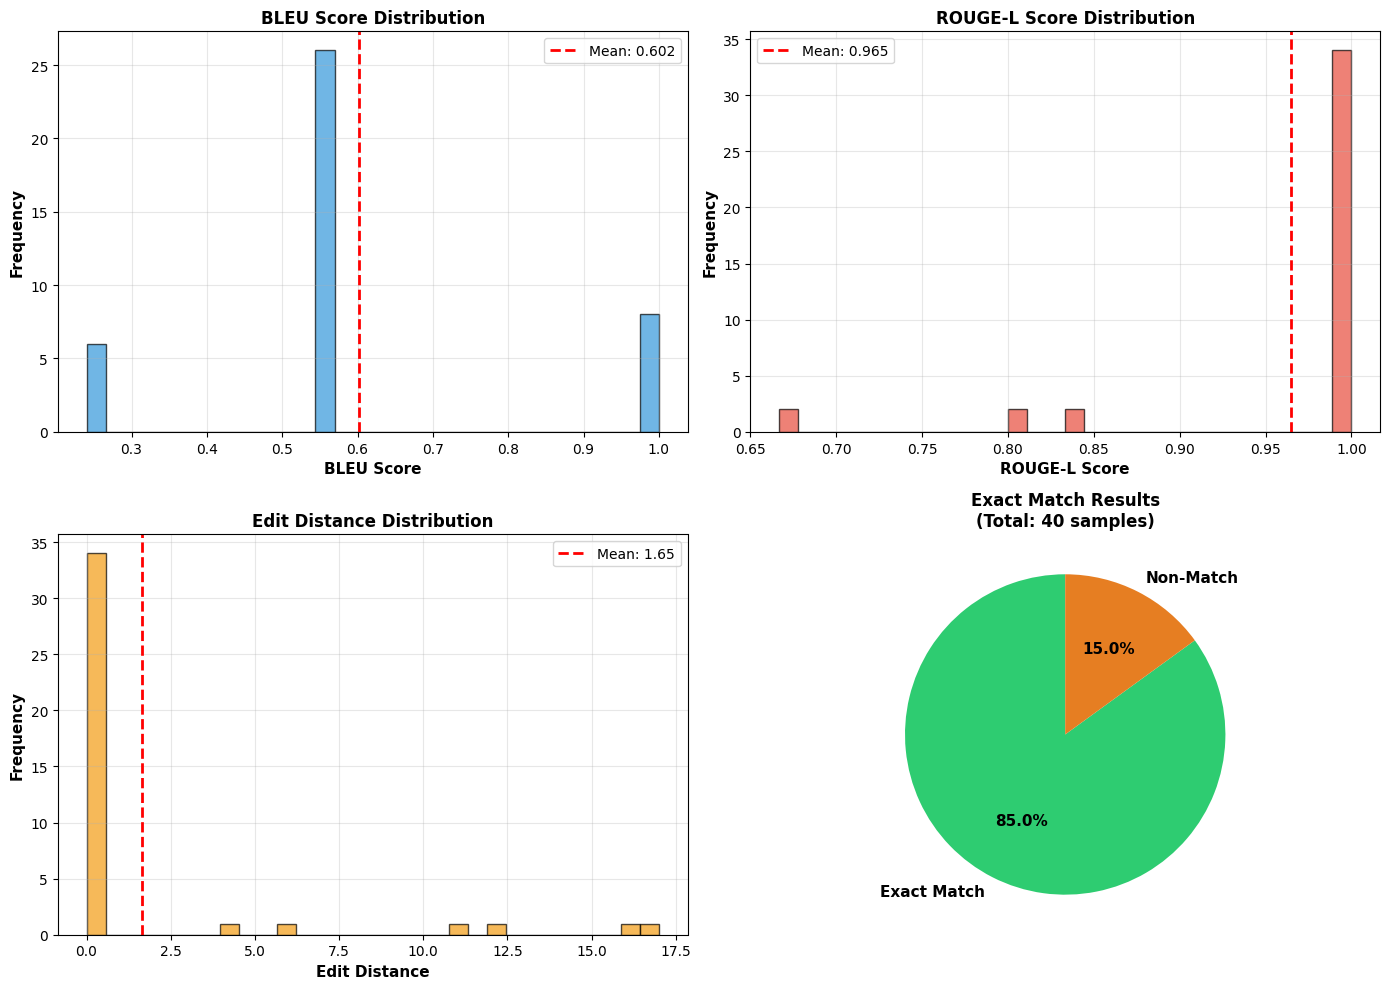


Generating word cloud...


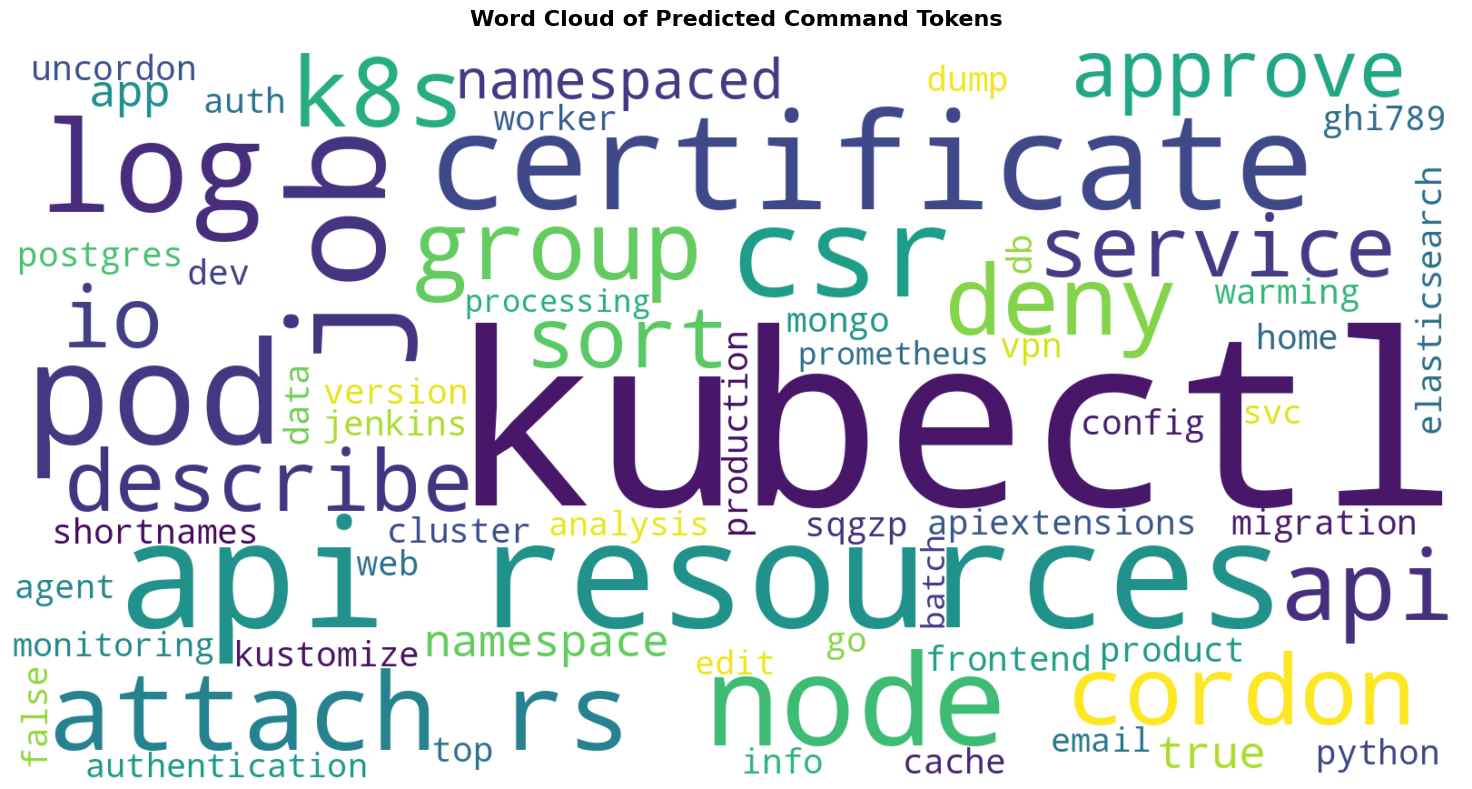

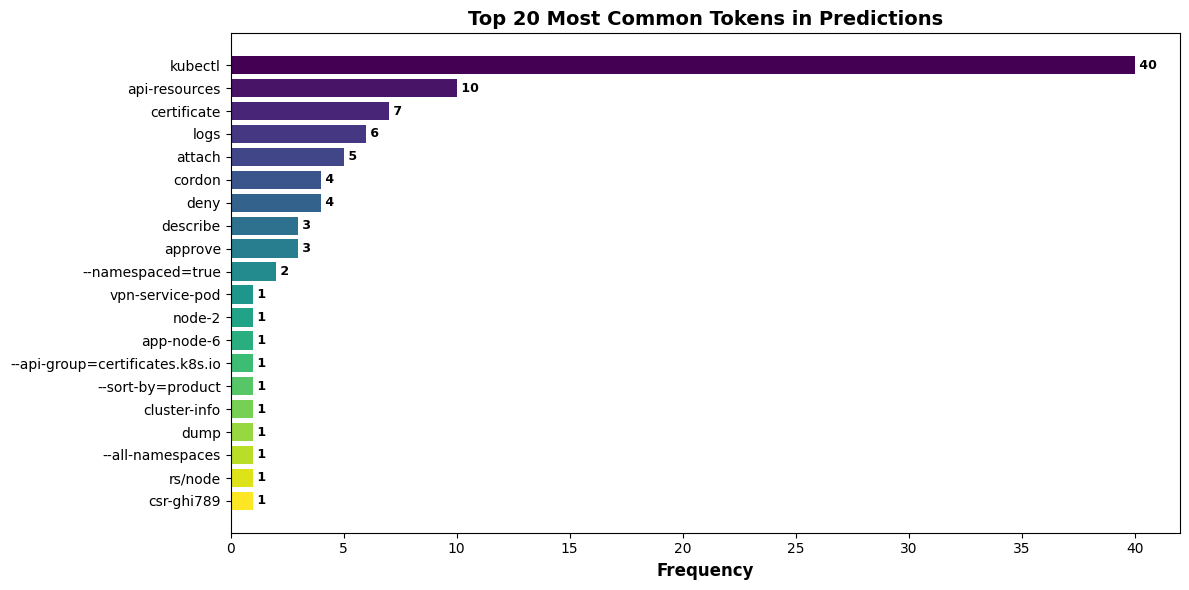


Detailed results saved to 'evaluation_results.csv'

DETAILED STATISTICS
BLEU Score - Min: 0.2403, Max: 1.0000, Std: 0.2288
ROUGE-L Score - Min: 0.6667, Max: 1.0000, Std: 0.0879
Edit Distance - Min: 0, Max: 17, Std: 4.34


In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, TrainingArguments, Trainer
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from transformers import T5ForConditionalGeneration, T5Tokenizer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import Levenshtein
from tqdm import tqdm

# Install required packages first (run these in separate cells):
# !pip install rouge-score
# !pip install python-Levenshtein
# !pip install wordcloud

# Load model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/checkpoint-23547")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def predict(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    output_ids = model.generate(inputs.input_ids, max_length=64)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Load test data
df_test = pd.read_csv("/content/drive/MyDrive/fullcommand2.csv")
df_test = df_test[['question', 'command']].dropna().head(200)

# Split to get the same test set (80/20 split)
from sklearn.model_selection import train_test_split
_, test_df = train_test_split(df_test, test_size=0.2, random_state=42)

# Initialize metrics
bleu_scores = []
rouge_scores = []
exact_matches = 0
edit_distances = []
all_predicted_tokens = []
all_reference_tokens = []

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
smoothing = SmoothingFunction().method1

print("Evaluating model on test set...")
for idx, row in tqdm(test_df.iterrows(), total=len(test_df)):
    question = row['question']
    reference = row['command']

    # Get prediction
    predicted = predict(question)

    # Tokenize for BLEU
    reference_tokens = reference.split()
    predicted_tokens = predicted.split()

    # Store tokens for word cloud
    all_predicted_tokens.extend(predicted_tokens)
    all_reference_tokens.extend(reference_tokens)

    # BLEU Score
    bleu = sentence_bleu([reference_tokens], predicted_tokens, smoothing_function=smoothing)
    bleu_scores.append(bleu)

    # ROUGE-L Score
    rouge = scorer.score(reference, predicted)
    rouge_scores.append(rouge['rougeL'].fmeasure)

    # Exact Match
    if predicted.strip() == reference.strip():
        exact_matches += 1

    # Edit Distance (Levenshtein)
    edit_dist = Levenshtein.distance(reference, predicted)
    edit_distances.append(edit_dist)

# Calculate aggregate metrics
avg_bleu = np.mean(bleu_scores)
avg_rouge = np.mean(rouge_scores)
exact_match_accuracy = exact_matches / len(test_df)
avg_edit_distance = np.mean(edit_distances)

# Print results
print("\n" + "="*50)
print("EVALUATION RESULTS")
print("="*50)
print(f"Average BLEU Score: {avg_bleu:.4f}")
print(f"Average ROUGE-L Score: {avg_rouge:.4f}")
print(f"Exact Match Accuracy: {exact_match_accuracy:.4f} ({exact_matches}/{len(test_df)})")
print(f"Average Edit Distance: {avg_edit_distance:.2f}")
print("="*50)

# ============================================
# VISUALIZATIONS
# ============================================

# 1. Metrics Bar Chart
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
metrics = ['BLEU', 'ROUGE-L', 'Exact Match', 'Normalized\nEdit Distance']
values = [avg_bleu, avg_rouge, exact_match_accuracy, 1 - (avg_edit_distance / 100)]  # Normalize edit distance
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

bars = ax.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Distribution Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# BLEU Distribution
axes[0, 0].hist(bleu_scores, bins=30, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(avg_bleu, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_bleu:.3f}')
axes[0, 0].set_xlabel('BLEU Score', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('BLEU Score Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# ROUGE-L Distribution
axes[0, 1].hist(rouge_scores, bins=30, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(avg_rouge, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_rouge:.3f}')
axes[0, 1].set_xlabel('ROUGE-L Score', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('ROUGE-L Score Distribution', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Edit Distance Distribution
axes[1, 0].hist(edit_distances, bins=30, color='#f39c12', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(avg_edit_distance, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_edit_distance:.2f}')
axes[1, 0].set_xlabel('Edit Distance', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Edit Distance Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Exact Match Pie Chart
em_labels = ['Exact Match', 'Non-Match']
em_values = [exact_matches, len(test_df) - exact_matches]
em_colors = ['#2ecc71', '#e67e22']
axes[1, 1].pie(em_values, labels=em_labels, autopct='%1.1f%%', colors=em_colors,
               startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1, 1].set_title(f'Exact Match Results\n(Total: {len(test_df)} samples)',
                     fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('metrics_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Word Cloud of Common Tokens in Predictions
print("\nGenerating word cloud...")
predicted_text = ' '.join(all_predicted_tokens)

wordcloud = WordCloud(width=1600, height=800,
                      background_color='white',
                      colormap='viridis',
                      max_words=100,
                      relative_scaling=0.5,
                      min_font_size=10).generate(predicted_text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Predicted Command Tokens', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('wordcloud_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Top 20 Most Common Tokens
token_counts = Counter(all_predicted_tokens)
top_tokens = token_counts.most_common(20)
tokens, counts = zip(*top_tokens)

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(tokens)), counts, color=plt.cm.viridis(np.linspace(0, 1, len(tokens))))
plt.yticks(range(len(tokens)), tokens)
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 20 Most Common Tokens in Predictions', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add count labels
for i, (token, count) in enumerate(zip(tokens, counts)):
    plt.text(count, i, f' {count}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('top_tokens.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Save detailed results to CSV
results_df = pd.DataFrame({
    'question': test_df['question'].values,
    'reference': test_df['command'].values,
    'predicted': [predict(q) for q in test_df['question'].values],
    'bleu_score': bleu_scores,
    'rouge_l_score': rouge_scores,
    'edit_distance': edit_distances,
    'exact_match': [1 if pred.strip() == ref.strip() else 0
                    for pred, ref in zip([predict(q) for q in test_df['question'].values],
                                        test_df['command'].values)]
})

results_df.to_csv('evaluation_results.csv', index=False)
print("\nDetailed results saved to 'evaluation_results.csv'")

# Summary statistics
print("\n" + "="*50)
print("DETAILED STATISTICS")
print("="*50)
print(f"BLEU Score - Min: {min(bleu_scores):.4f}, Max: {max(bleu_scores):.4f}, Std: {np.std(bleu_scores):.4f}")
print(f"ROUGE-L Score - Min: {min(rouge_scores):.4f}, Max: {max(rouge_scores):.4f}, Std: {np.std(rouge_scores):.4f}")
print(f"Edit Distance - Min: {min(edit_distances)}, Max: {max(edit_distances)}, Std: {np.std(edit_distances):.2f}")
print("="*50)

Evaluating model on test set...


100%|██████████| 4200/4200 [2:03:31<00:00,  1.76s/it]



EVALUATION RESULTS
Average BLEU Score: 0.8375
Average ROUGE-L Score: 0.9392
Exact Match Accuracy: 0.7112 (2987/4200)
Average Edit Distance: 4.48


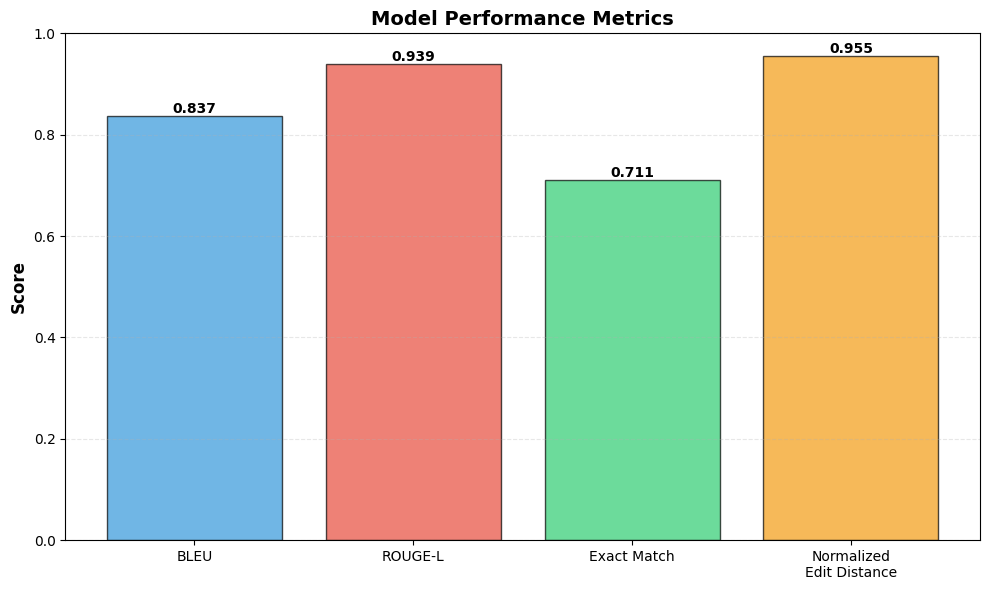

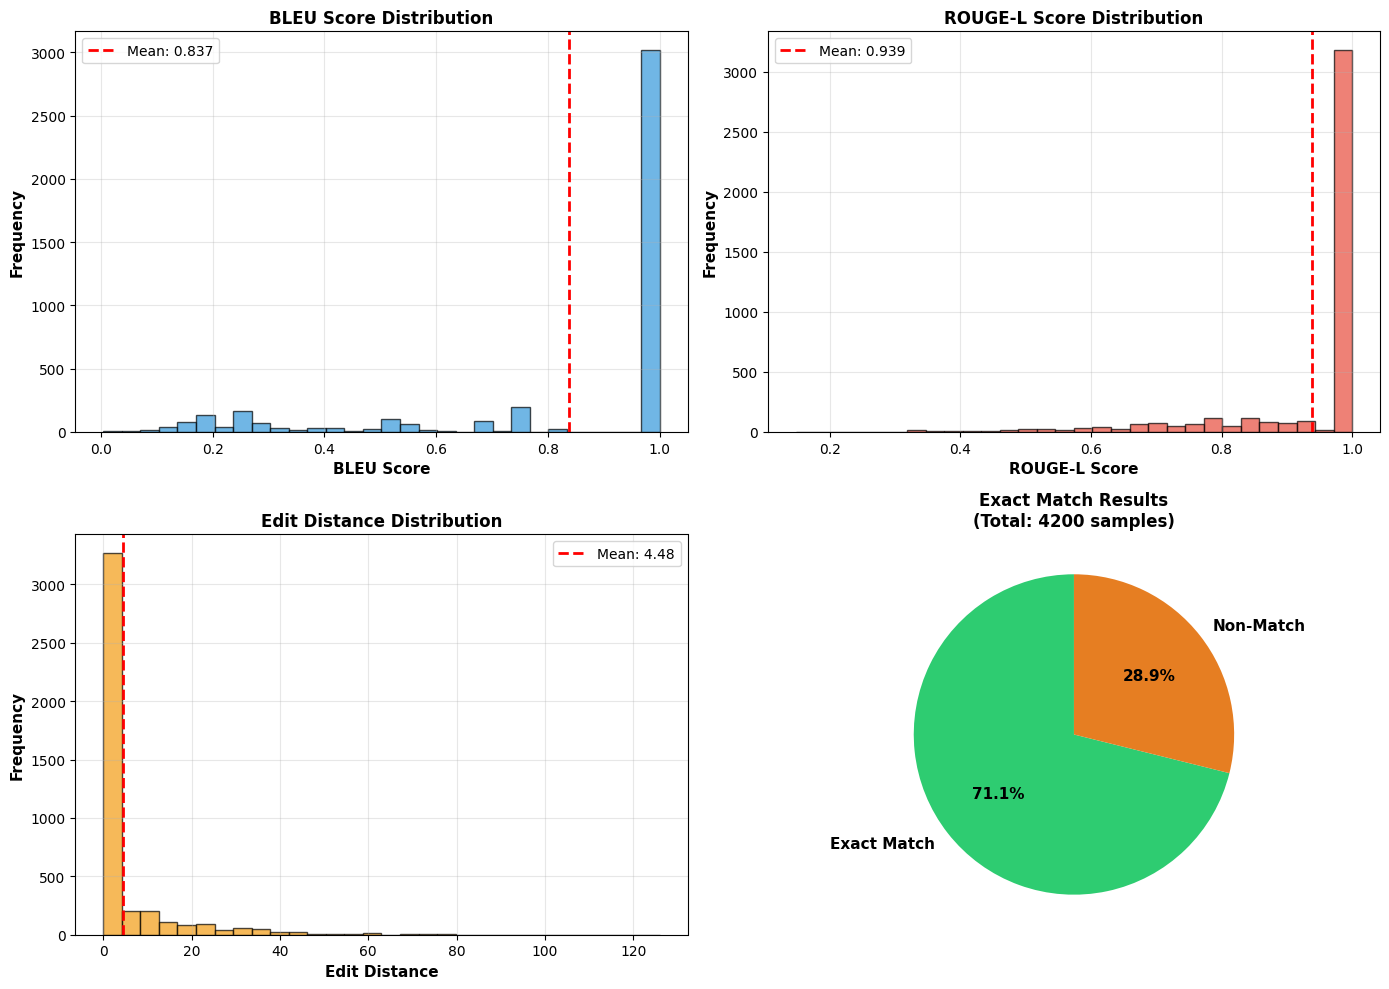


Generating word cloud...


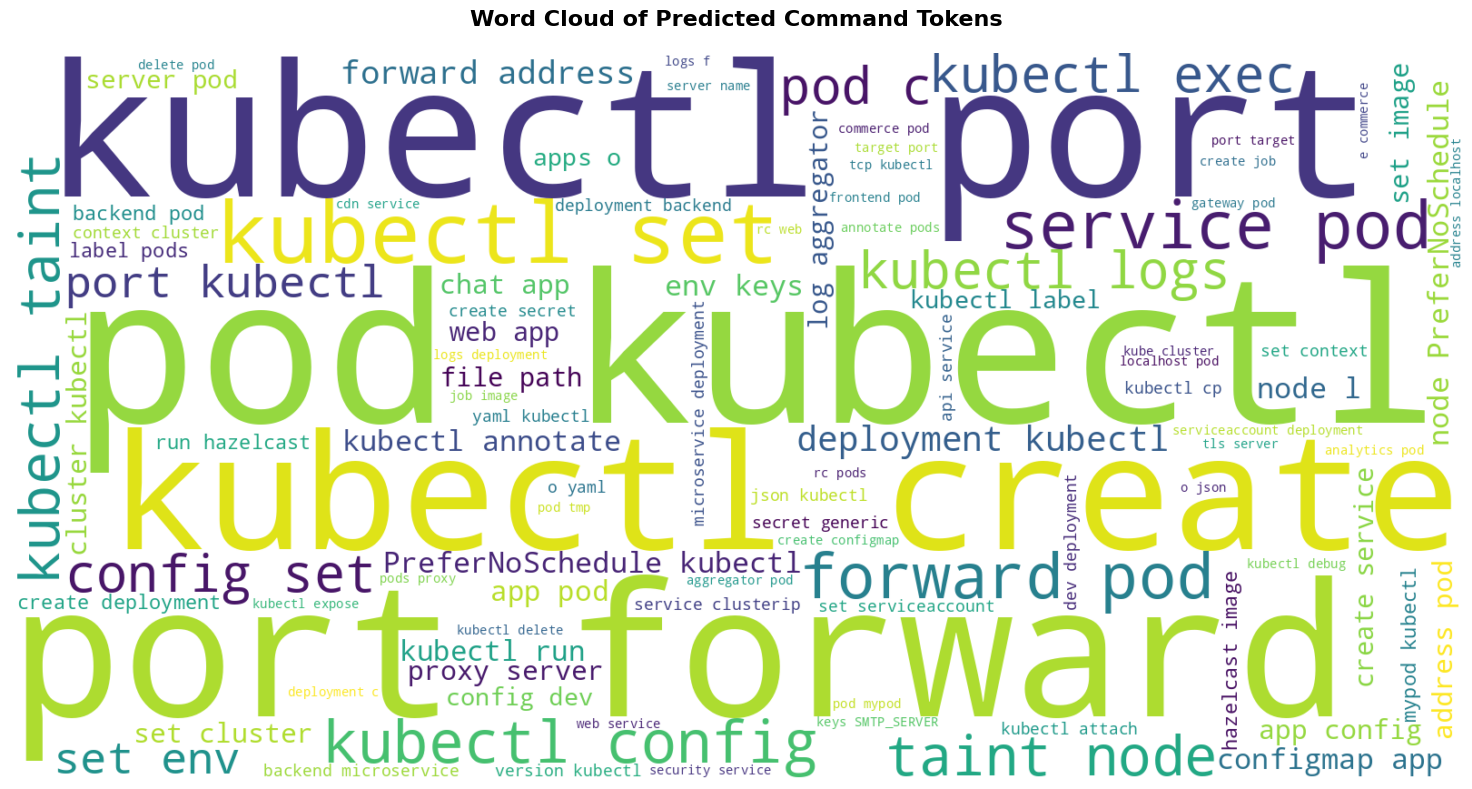

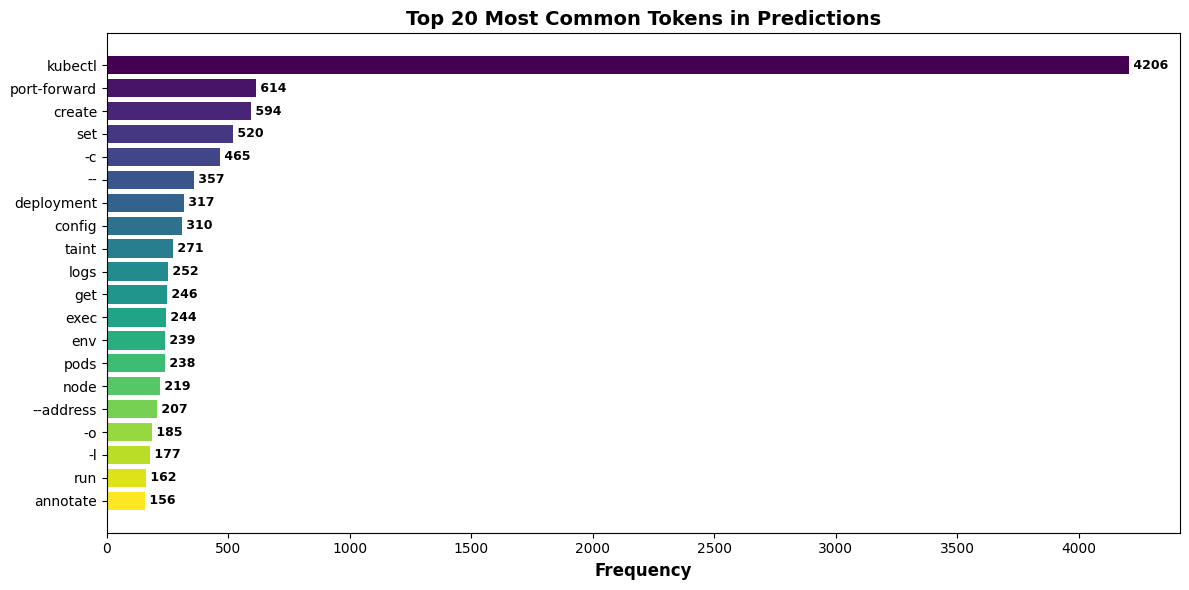

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, TrainingArguments, Trainer
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from transformers import T5ForConditionalGeneration, T5Tokenizer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import Levenshtein
from tqdm import tqdm

# Install required packages first (run these in separate cells):
# !pip install rouge-score
# !pip install python-Levenshtein
# !pip install wordcloud

# Load model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/checkpoint-23547")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def predict(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    output_ids = model.generate(inputs.input_ids, max_length=64)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Load test data
df_test = pd.read_csv("/content/drive/MyDrive/fullcommand2.csv")
df_test = df_test[['question', 'command']].dropna().head(21000)

# Split to get the same test set (80/20 split)
from sklearn.model_selection import train_test_split
_, test_df = train_test_split(df_test, test_size=0.2, random_state=42)

# Initialize metrics
bleu_scores = []
rouge_scores = []
exact_matches = 0
edit_distances = []
all_predicted_tokens = []
all_reference_tokens = []

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
smoothing = SmoothingFunction().method1

print("Evaluating model on test set...")
for idx, row in tqdm(test_df.iterrows(), total=len(test_df)):
    question = row['question']
    reference = row['command']

    # Get prediction
    predicted = predict(question)

    # Tokenize for BLEU
    reference_tokens = reference.split()
    predicted_tokens = predicted.split()

    # Store tokens for word cloud
    all_predicted_tokens.extend(predicted_tokens)
    all_reference_tokens.extend(reference_tokens)

    # BLEU Score
    bleu = sentence_bleu([reference_tokens], predicted_tokens, smoothing_function=smoothing)
    bleu_scores.append(bleu)

    # ROUGE-L Score
    rouge = scorer.score(reference, predicted)
    rouge_scores.append(rouge['rougeL'].fmeasure)

    # Exact Match
    if predicted.strip() == reference.strip():
        exact_matches += 1

    # Edit Distance (Levenshtein)
    edit_dist = Levenshtein.distance(reference, predicted)
    edit_distances.append(edit_dist)

# Calculate aggregate metrics
avg_bleu = np.mean(bleu_scores)
avg_rouge = np.mean(rouge_scores)
exact_match_accuracy = exact_matches / len(test_df)
avg_edit_distance = np.mean(edit_distances)

# Print results
print("\n" + "="*50)
print("EVALUATION RESULTS")
print("="*50)
print(f"Average BLEU Score: {avg_bleu:.4f}")
print(f"Average ROUGE-L Score: {avg_rouge:.4f}")
print(f"Exact Match Accuracy: {exact_match_accuracy:.4f} ({exact_matches}/{len(test_df)})")
print(f"Average Edit Distance: {avg_edit_distance:.2f}")
print("="*50)

# ============================================
# VISUALIZATIONS
# ============================================

# 1. Metrics Bar Chart
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
metrics = ['BLEU', 'ROUGE-L', 'Exact Match', 'Normalized\nEdit Distance']
values = [avg_bleu, avg_rouge, exact_match_accuracy, 1 - (avg_edit_distance / 100)]  # Normalize edit distance
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

bars = ax.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Distribution Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# BLEU Distribution
axes[0, 0].hist(bleu_scores, bins=30, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(avg_bleu, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_bleu:.3f}')
axes[0, 0].set_xlabel('BLEU Score', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('BLEU Score Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# ROUGE-L Distribution
axes[0, 1].hist(rouge_scores, bins=30, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(avg_rouge, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_rouge:.3f}')
axes[0, 1].set_xlabel('ROUGE-L Score', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('ROUGE-L Score Distribution', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Edit Distance Distribution
axes[1, 0].hist(edit_distances, bins=30, color='#f39c12', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(avg_edit_distance, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_edit_distance:.2f}')
axes[1, 0].set_xlabel('Edit Distance', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Edit Distance Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Exact Match Pie Chart
em_labels = ['Exact Match', 'Non-Match']
em_values = [exact_matches, len(test_df) - exact_matches]
em_colors = ['#2ecc71', '#e67e22']
axes[1, 1].pie(em_values, labels=em_labels, autopct='%1.1f%%', colors=em_colors,
               startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1, 1].set_title(f'Exact Match Results\n(Total: {len(test_df)} samples)',
                     fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('metrics_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Word Cloud of Common Tokens in Predictions
print("\nGenerating word cloud...")
predicted_text = ' '.join(all_predicted_tokens)

wordcloud = WordCloud(width=1600, height=800,
                      background_color='white',
                      colormap='viridis',
                      max_words=100,
                      relative_scaling=0.5,
                      min_font_size=10).generate(predicted_text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Predicted Command Tokens', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('wordcloud_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Top 20 Most Common Tokens
token_counts = Counter(all_predicted_tokens)
top_tokens = token_counts.most_common(20)
tokens, counts = zip(*top_tokens)

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(tokens)), counts, color=plt.cm.viridis(np.linspace(0, 1, len(tokens))))
plt.yticks(range(len(tokens)), tokens)
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 20 Most Common Tokens in Predictions', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add count labels
for i, (token, count) in enumerate(zip(tokens, counts)):
    plt.text(count, i, f' {count}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('top_tokens.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Save detailed results to CSV
results_df = pd.DataFrame({
    'question': test_df['question'].values,
    'reference': test_df['command'].values,
    'predicted': [predict(q) for q in test_df['question'].values],
    'bleu_score': bleu_scores,
    'rouge_l_score': rouge_scores,
    'edit_distance': edit_distances,
    'exact_match': [1 if pred.strip() == ref.strip() else 0
                    for pred, ref in zip([predict(q) for q in test_df['question'].values],
                                        test_df['command'].values)]
})

results_df.to_csv('evaluation_results.csv', index=False)
print("\nDetailed results saved to 'evaluation_results.csv'")

# Summary statistics
print("\n" + "="*50)
print("DETAILED STATISTICS")
print("="*50)
print(f"BLEU Score - Min: {min(bleu_scores):.4f}, Max: {max(bleu_scores):.4f}, Std: {np.std(bleu_scores):.4f}")
print(f"ROUGE-L Score - Min: {min(rouge_scores):.4f}, Max: {max(rouge_scores):.4f}, Std: {np.std(rouge_scores):.4f}")
print(f"Edit Distance - Min: {min(edit_distances)}, Max: {max(edit_distances)}, Std: {np.std(edit_distances):.2f}")
print("="*50)